# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 140MB/s]


## Importing Libraries

In [127]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [74]:
df=pd.read_csv("Bus_Breakdown_and_Delays.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [10]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [67]:
df.head()

,Run_Type,Route_Number,Reason,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,Pre-K/EI,1,Other,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,Pre-K/EI,1,Heavy Traffic,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,Pre-K/EI,2,Heavy Traffic,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,Pre-K/EI,2,Other,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,Pre-K/EI,2,Other,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [12]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [15]:
df["Run_Type"].value_counts()

,count
Run_Type,
Special Ed AM Run,85990
Pre-K/EI,20951
Special Ed PM Run,17672
General Ed AM Run,17182
General Ed PM Run,4541
Special Ed Field Trip,628
General Ed Field Trip,570
Project Read PM Run,300
Project Read AM Run,47


In [17]:
df["Route_Number"].value_counts()

,count
Route_Number,
1,2569
2,2217
3,1904
5,1740
4,1093
...,...
26Q7MD,1
M688,1
JC-1,1


In [18]:
df["Reason"].value_counts()

,count
Reason,
Heavy Traffic,87426
Other,21666
Mechanical Problem,13908
Won`t Start,7277
Flat Tire,4585
Weather Conditions,4527
Late return from Field Trip,3464
Problem Run,2204
Delayed by School,1446


In [19]:
df["Boro"].value_counts()

,count
Boro,
Bronx,40995
Brooklyn,35632
Manhattan,28675
Queens,21169
Staten Island,6923
Westchester,4535
Nassau County,1970
New Jersey,887
Rockland County,491


In [20]:
df["How_Long_Delayed"].value_counts()

,count
How_Long_Delayed,
20 MINS,5662
30 MINS,4542
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
45 MON,1
18 mins,1
146,1


In [21]:
df["Incident_Number"].value_counts()

,count
Incident_Number,
x,113
X,77
e,65
90276267,24
90278844,16
...,...
90032402,1
90032400,1
90032401,1


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [22]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [71]:
df["Reason"].value_counts()

,count
Reason,
Heavy Traffic,87426
Other,21666
Mechanical Problem,13908
Won`t Start,7277
Flat Tire,4585
Weather Conditions,4527
Late return from Field Trip,3464
Problem Run,2204
Delayed by School,1446


In [75]:
df.drop("School_Year",axis=1,inplace=True)
df.drop("Busbreakdown_ID",axis=1,inplace=True)
df.drop("Bus_No",axis=1,inplace=True)
df.drop("Schools_Serviced",axis=1,inplace=True)
df.drop("Occurred_On",axis=1,inplace=True)
df.drop("Created_On",axis=1,inplace=True)
df.drop("Informed_On",axis=1,inplace=True)
df.drop("Incident_Number",axis=1,inplace=True)
df.drop("Last_Updated_On",axis=1,inplace=True)

In [96]:
df=df.dropna(subset=("Run_Type"))
df=df.dropna(subset=("Route_Number"))
df=df.dropna(subset=("Reason"))
df.drop("Boro",axis=1,inplace=True)
df.drop("How_Long_Delayed",axis=1,inplace=True)
df.drop("Route_Number",axis=1,inplace=True)



In [116]:
df["Number_Of_Students_On_The_Bus"].value_counts()

,count
Number_Of_Students_On_The_Bus,
0,78573
2,10203
1,9342
3,9225
4,7656
...,...
3112,1
2680,1
2844,1


In [103]:
l=LabelEncoder()
df["Run_Type_cat"]=l.fit_transform(df["Run_Type"])
df["Reason_cat"]=l.fit_transform(df["Reason"])
df["Bus_Company_Name_cat"]=l.fit_transform(df["Bus_Company_Name"])
df["Has_Contractor_Notified_Schools_cat"]=l.fit_transform(df["Has_Contractor_Notified_Schools"])
df["Has_Contractor_Notified_Parents_cat"]=l.fit_transform(df["Has_Contractor_Notified_Parents"])
df["Have_You_Alerted_OPT_cat"]=l.fit_transform(df["Have_You_Alerted_OPT"])
df["Breakdown_or_Running_Late_cat"]=l.fit_transform(df["Breakdown_or_Running_Late"])
df["School_Age_or_PreK_cat"]=l.fit_transform(df["School_Age_or_PreK"])

In [158]:
df["Number_Of_Students_On_The_Bus_"]=MinMaxScaler().fit_transform(df[["Number_Of_Students_On_The_Bus"]])

In [159]:
y=df["Breakdown_or_Running_Late_cat"]
cat=[j for j in df.columns if "cat" in j]
#cat.append("Number_Of_Students_On_The_Bus")
cat.append("Number_Of_Students_On_The_Bus_")

cat.remove("Breakdown_or_Running_Late_cat")

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [160]:
x_train,x_test,y_train,y_test=train_test_split(df[cat],y,test_size=0.2)

In [153]:
x_train.shape

(118154, 8)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [161]:
model=tf.keras.models.Sequential()
model.add(layers.Dense(512,activation="relu",input_shape=(8,)))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [162]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

## Training the Model
Train the ANN model using the training data.

In [163]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8877 - loss: 0.3175
Epoch 2/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9147 - loss: 0.1918
Epoch 3/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9289 - loss: 0.1674
Epoch 4/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9304 - loss: 0.1617
Epoch 5/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9347 - loss: 0.1567
Epoch 6/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9365 - loss: 0.1499
Epoch 7/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9372 - loss: 0.1519
Epoch 8/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9398 - loss: 0.1459
Epoch 9/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9411 - loss: 0.1436
Epoch 10/10
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9407 - loss: 0.1440


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [164]:
model.evaluate(x_test,y_test)

924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9448 - loss: 0.1368


[0.14162245392799377, 0.943261444568634]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [165]:
model.predict(x_test)

924/924 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.9942066 ],
       [0.99928904],
       [0.9999553 ],
       ...,
       [0.99948996],
       [0.99950844],
       [0.22594176]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

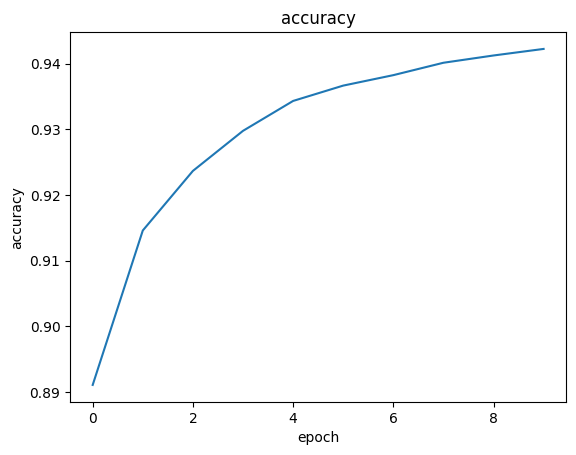

In [144]:
plt.title("accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(history.epoch,history.history["accuracy"])

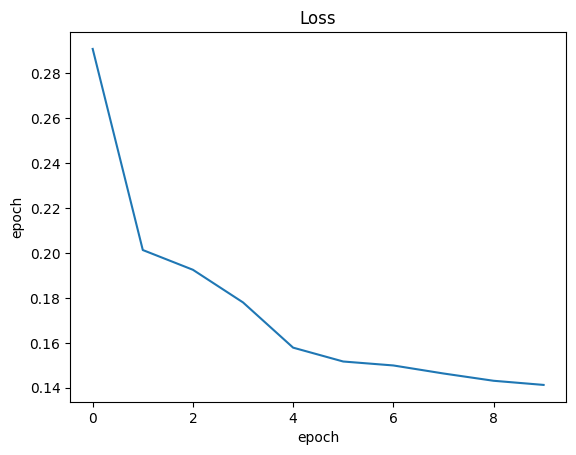

In [143]:
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.plot(history.epoch,history.history["loss"])

## Save the Model
Save the trained model for submission.

In [145]:
model.save("my_model.h5")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1- i chosed the releated columns and ignore other columns such as bus_id

2- for deep learning we must try diffrent Architectures, i tried diffrent Architectures and the final one is good enough for activation mostly hidden lasyers are relu and last layer is sigmoid because it is binary classification

3 and 4- most of the time the optimzer is adam and metric is accuracy for classification problem, for the loss it deppend if it is binary or multiclass classification, for this one it is binary so i used binary crossentropy


5- the model is not overfitting so no need for Regularization Techniques


6- for model Evaluation just used model.evluate

7 and 8-  the model is neither overfitting nor underfitting


